# Example 1: The image and probe reconstruction from simulated frames

In [1]:
import sys
import time
from datetime import timedelta, datetime, tzinfo
import argparse
import numpy as np
import h5py
import sharp
import sharpnsls2
import matplotlib.pyplot as plt
# make graphics inline
# %matplotlib inline
%matplotlib notebook

In [2]:
sharpNSLS2 = sharpnsls2.PySharpNSLS2()

Set the input parameters and initialize containers

In [3]:
niters = 101
args = ['local', 'e1.cxi']

t1 = datetime.now();
sharpNSLS2.setArgs(args)
t2 = datetime.now()

print ("initialization time: ", (t2 - t1))

initialization time:  0:00:01.286914


Plot the initial image

<IPython.core.display.Javascript object>


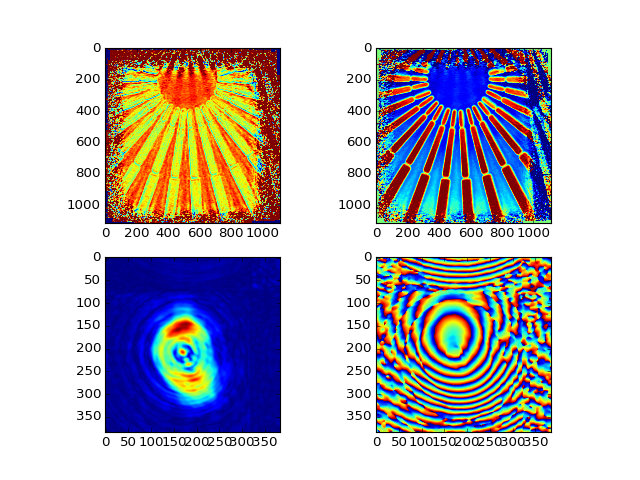

In [4]:
# f, (ax1, ax2) = plt.subplots(1, 2)
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

object = sharpNSLS2.getObject()
ax1.imshow(np.abs(object))
ax2.imshow(np.angle(object))  

probe = sharpNSLS2.getProbe()
ax3.imshow(np.abs(probe))
ax4.imshow(np.angle(probe))  

f.canvas.draw()

Define a function for processing and monitoring one iteration of the reconstruction algorithm

In [5]:
def make_step(i):
    sharpNSLS2.step()
    
    object = sharpNSLS2.getObject()
    ax1.imshow(np.abs(object))
    ax2.imshow(np.angle(object))  
    
    probe = sharpNSLS2.getProbe()
    ax3.imshow(np.abs(probe))
    ax4.imshow(np.angle(probe))    
    
    f.canvas.draw()

Run the reconstruction algorithm

In [6]:
sharpNSLS2.init()

t1 = datetime.now();
for i in range(niters):
    make_step(i)
    print(i, ", obj_err: ", sharpNSLS2.getObjectError(), ", prb_err: ", sharpNSLS2.getProbeError())
t2 = datetime.now()    

print ("reconstruction time: ", (t2 - t1))

0 , obj_err:  0.9037179946899414 , prb_err:  0.0
1 , obj_err:  1.800818681716919 , prb_err:  0.0
2 , obj_err:  1.0756804943084717 , prb_err:  0.9959374666213989
3 , obj_err:  1.356429100036621 , prb_err:  0.21901369094848633
4 , obj_err:  0.9644376039505005 , prb_err:  0.176399827003479
5 , obj_err:  0.9514846801757812 , prb_err:  0.12360050529241562
6 , obj_err:  0.7969920039176941 , prb_err:  0.12757258117198944
7 , obj_err:  0.7796798348426819 , prb_err:  0.10967148840427399
8 , obj_err:  0.7241540551185608 , prb_err:  0.10203858464956284
9 , obj_err:  0.722504198551178 , prb_err:  0.10545596480369568
10 , obj_err:  0.7182645201683044 , prb_err:  0.10457977652549744
11 , obj_err:  0.7336084842681885 , prb_err:  0.10984828323125839
12 , obj_err:  0.7478196024894714 , prb_err:  0.11212363094091415
13 , obj_err:  0.7620934844017029 , prb_err:  0.11526647210121155
14 , obj_err:  0.7698792219161987 , prb_err:  0.11735904216766357
15 , obj_err:  0.7789369821548462 , prb_err:  0.1211080104

# Write results

In [7]:
object = sharpNSLS2.getObject()
np.save("object", object)

probe = sharpNSLS2.getProbe()
np.save("probe", probe)